<a href="https://colab.research.google.com/github/albivaltzew/urbancode_samolet/blob/main/ROBOFLOW_train_yolov8_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!pip install clearml>=1.2.0

In [2]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=EVO2BIL3VYQLX9GG59KL
%env CLEARML_API_SECRET_KEY=eJ3UToZ1hUVwz7g56rdn3hTHEc6JD7q4NxM9LyYjXvhaSFwCaF

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=EVO2BIL3VYQLX9GG59KL
env: CLEARML_API_SECRET_KEY=eJ3UToZ1hUVwz7g56rdn3hTHEc6JD7q4NxM9LyYjXvhaSFwCaF


In [3]:
!clearml-init

ClearML SDK setup process

Please create new clearml credentials through the settings page in your `clearml-server` web app (e.g. http://localhost:8080//settings/workspace-configuration) 
Or create a free account at https://app.clear.ml/settings/workspace-configuration

In settings page, press "Create new credentials", then press "Copy to clipboard".

Paste copied configuration here:
api {      # Aleksey Byvaltsev's workspace     web_server: https://app.clear.ml     api_server: https://api.clear.ml     files_server: https://files.clear.ml     credentials {         "access_key" = "NA7C5RT3FMG08HGGSR0C"         "secret_key"  = "U44VYqGqX9RnL7dhOaYMEGSpAShmcIb132ucazt94hUuxTqF07"     } }
Detected credentials key="NA7C5RT3FMG08HGGSR0C" secret="U44V***"

ClearML Hosts configuration:
Web App: https://app.clear.ml
API: https://api.clear.ml
File Store: https://files.clear.ml

Verifying credentials ...
Credentials verified!

New configuration stored in /root/clearml.conf
ClearML setup completed

In [4]:
!nvidia-smi

Sat Sep 23 17:31:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20
# !pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ExdBm0IQvKzuW27klbVZ")
project = rf.workspace("samolethack").project("samolet-final")
dataset = project.version(2).download("yolov8")


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to samolet-final-2 in yolov8:: 100%|██████████| 6846/6846 [00:01<00:00, 3698.91it/s]


## Custom Training

In [ ]:
# %cd {HOME}

# !yolo task=detect mode=train resume=True model=/content/last_yolo8n_112_interrupted.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True batch=8 optimizer=Adam patience=25

In [ ]:
from clearml import Task
from ultralytics import YOLO

task.close()
# Create a ClearML Task
task = Task.init(
    project_name="YOLOv8",
    task_name="yolo nano training"
)

# Load a model
model_variant = "last100n"
# Log "model_variant" parameter to task
task.set_parameter("model_variant", model_variant)

# Load the YOLOv8 model
model = YOLO(f'/content/{model_variant}.pt')


# Put all YOLOv8 arguments in a dictionary and pass it to ClearML
# When the arguments are later changed in UI, they will be overridden here!
args = dict(data=f"{dataset.location}/data.yaml", epochs=50, imgsz=640, plots=True, batch=8, optimizer="Adam", patience=25)
task.connect(args)

# Train the model
# If running remotely, the arguments may be overridden by ClearML if they were changed in the UI
results = model.train(**args)

ClearML Task: created new task id=f95ddf84577849dfb8bc8741a03350e9
ClearML results page: https://app.clear.ml/projects/7a50647762b644e7be0ee665879bf9ef/experiments/f95ddf84577849dfb8bc8741a03350e9/output/log


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/samolet-final-2/data.yaml, epochs=50, patience=25, batch=8, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=F

ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


       1/50      10.1G      1.311     0.9106      1.095        999        640: 100%|██████████| 340/340 [03:59<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:14<00:00,  1.54it/s]
                   all        345      40001       0.67      0.547        0.6      0.369
                     0        345      11809      0.835      0.311      0.539      0.337
                     1        345      12312      0.557      0.635      0.604      0.359
                     2        345      15880      0.618      0.695      0.656      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/50      10.7G       1.44      1.046      1.165       1074        640: 100%|██████████| 340/340 [03:34<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:10<00:00,  2.07it/s]
                   all        3

In [ ]:
!nvidia-smi

Sat Sep 23 12:47:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch27200.jpg
confusion_matrix.png				    train_batch27201.jpg
events.out.tfevents.1695460791.b9929db78175.5723.0  train_batch27202.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


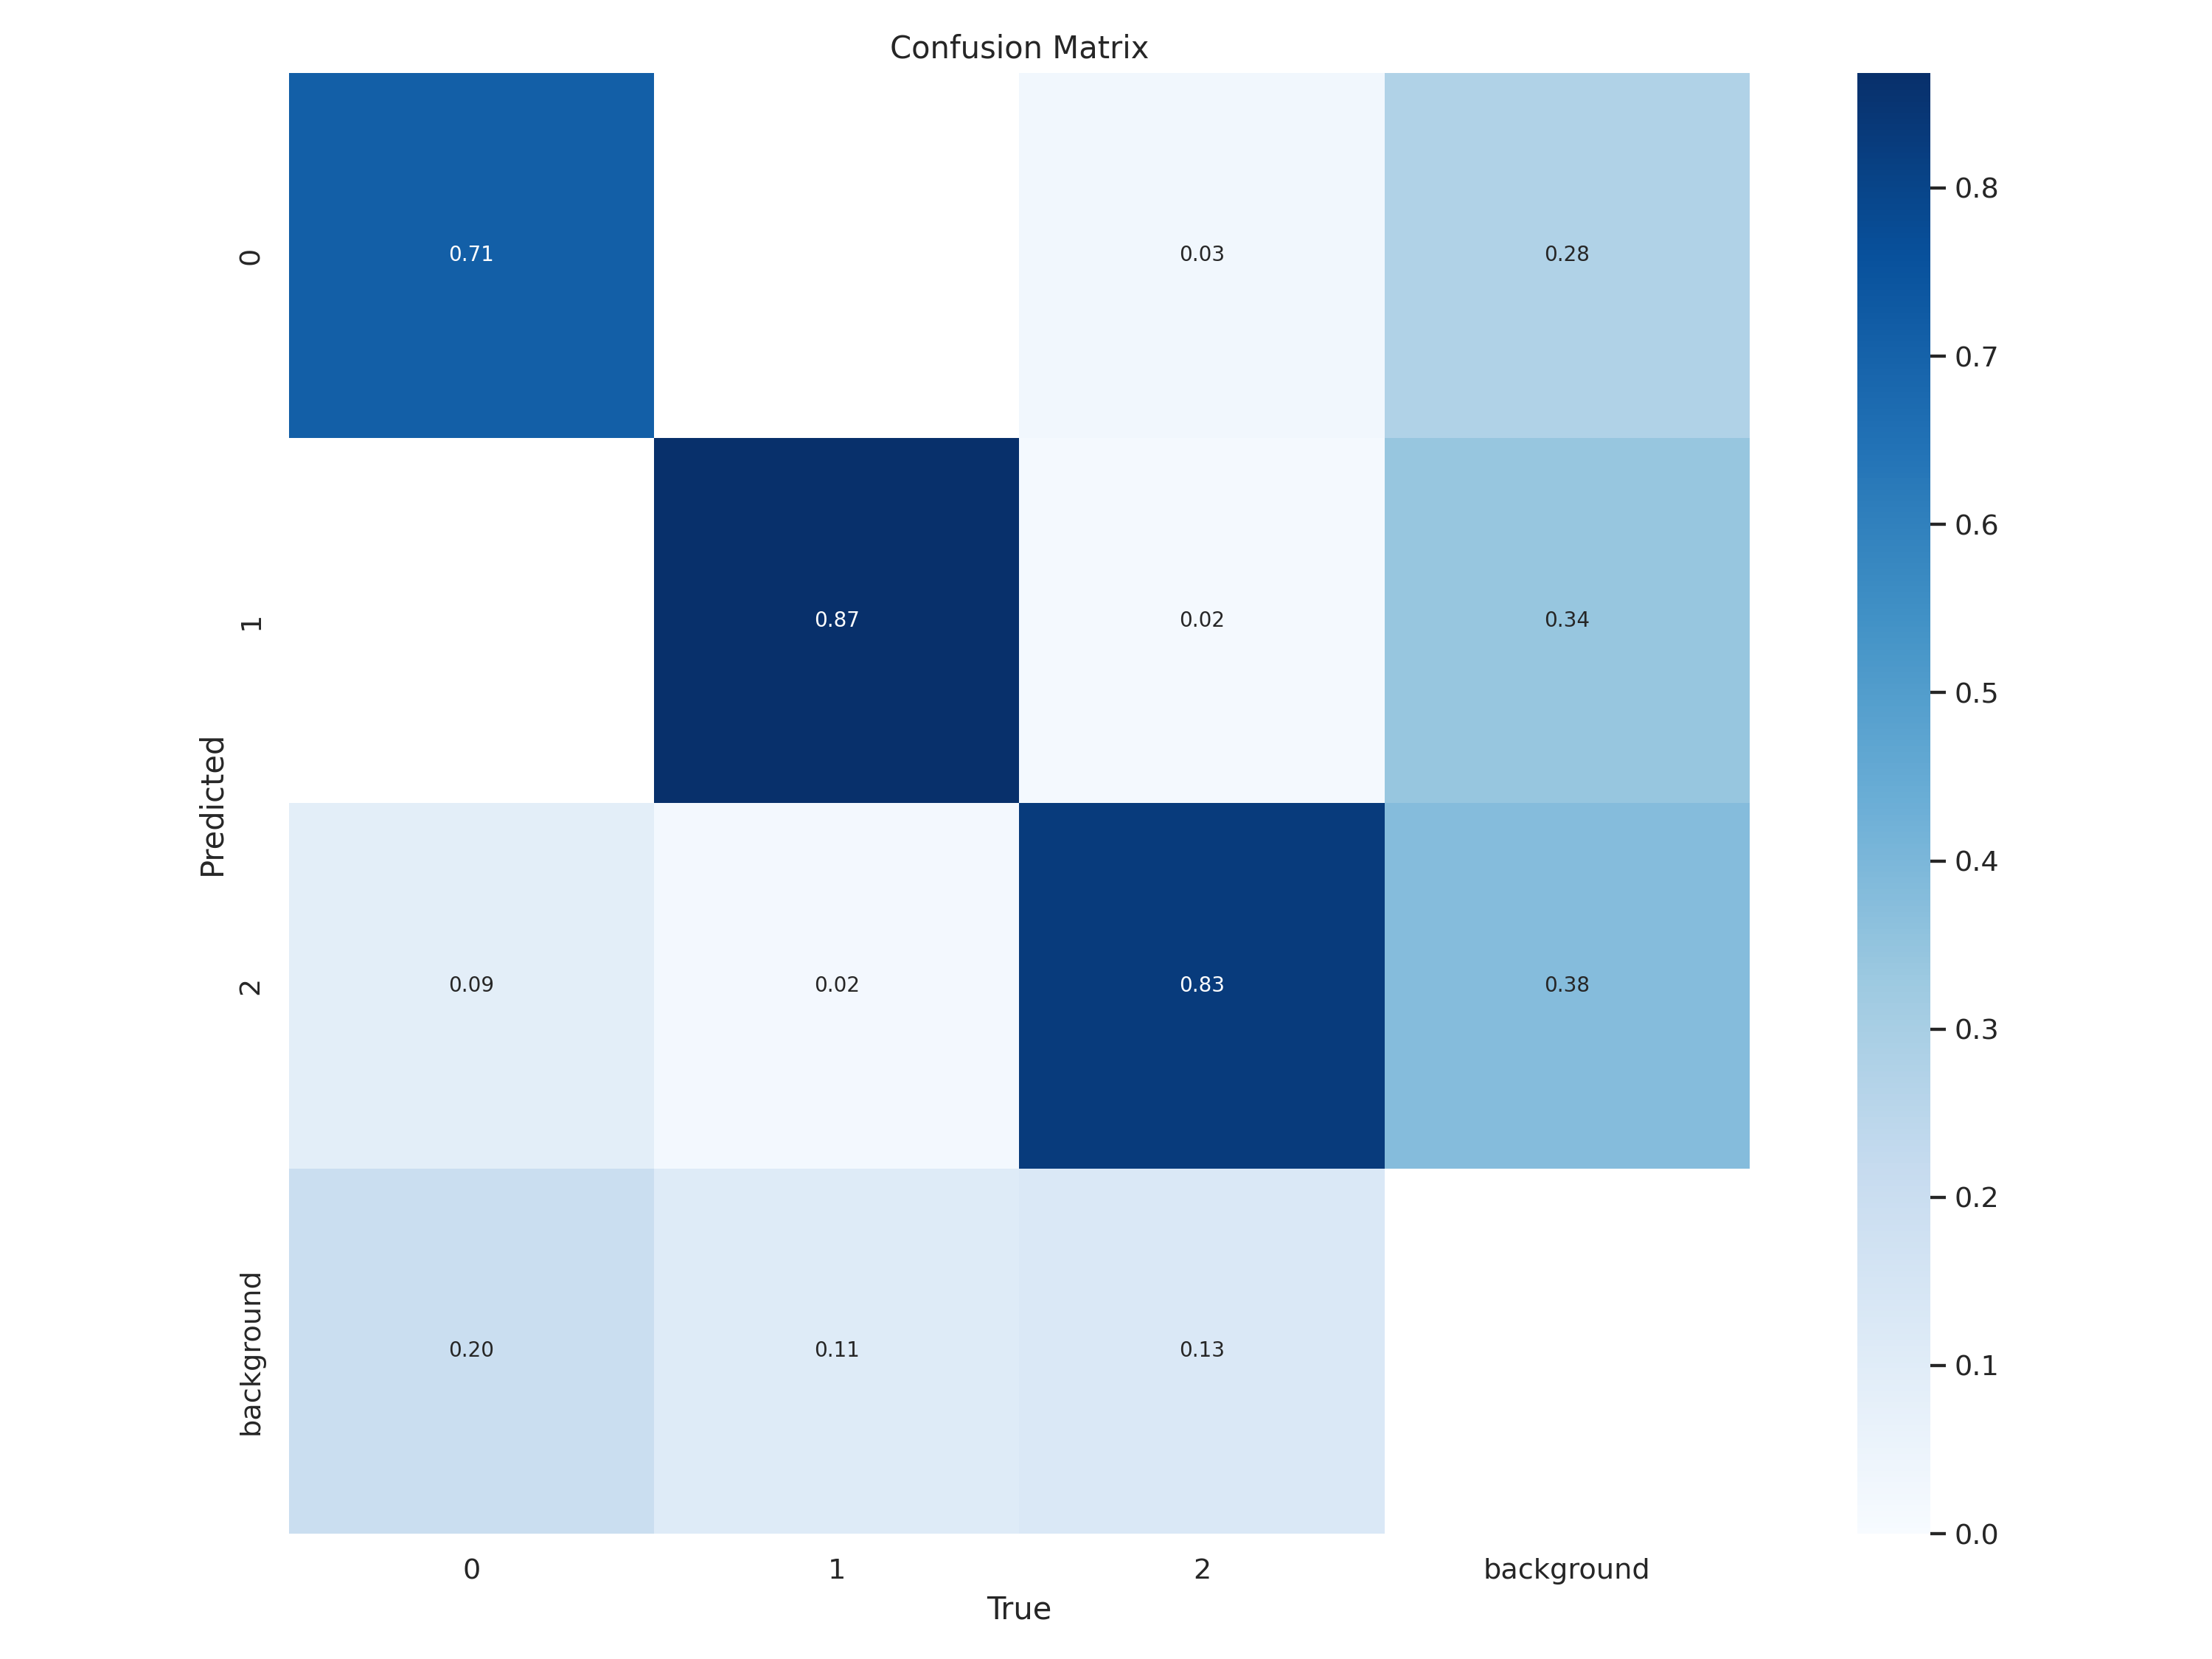

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


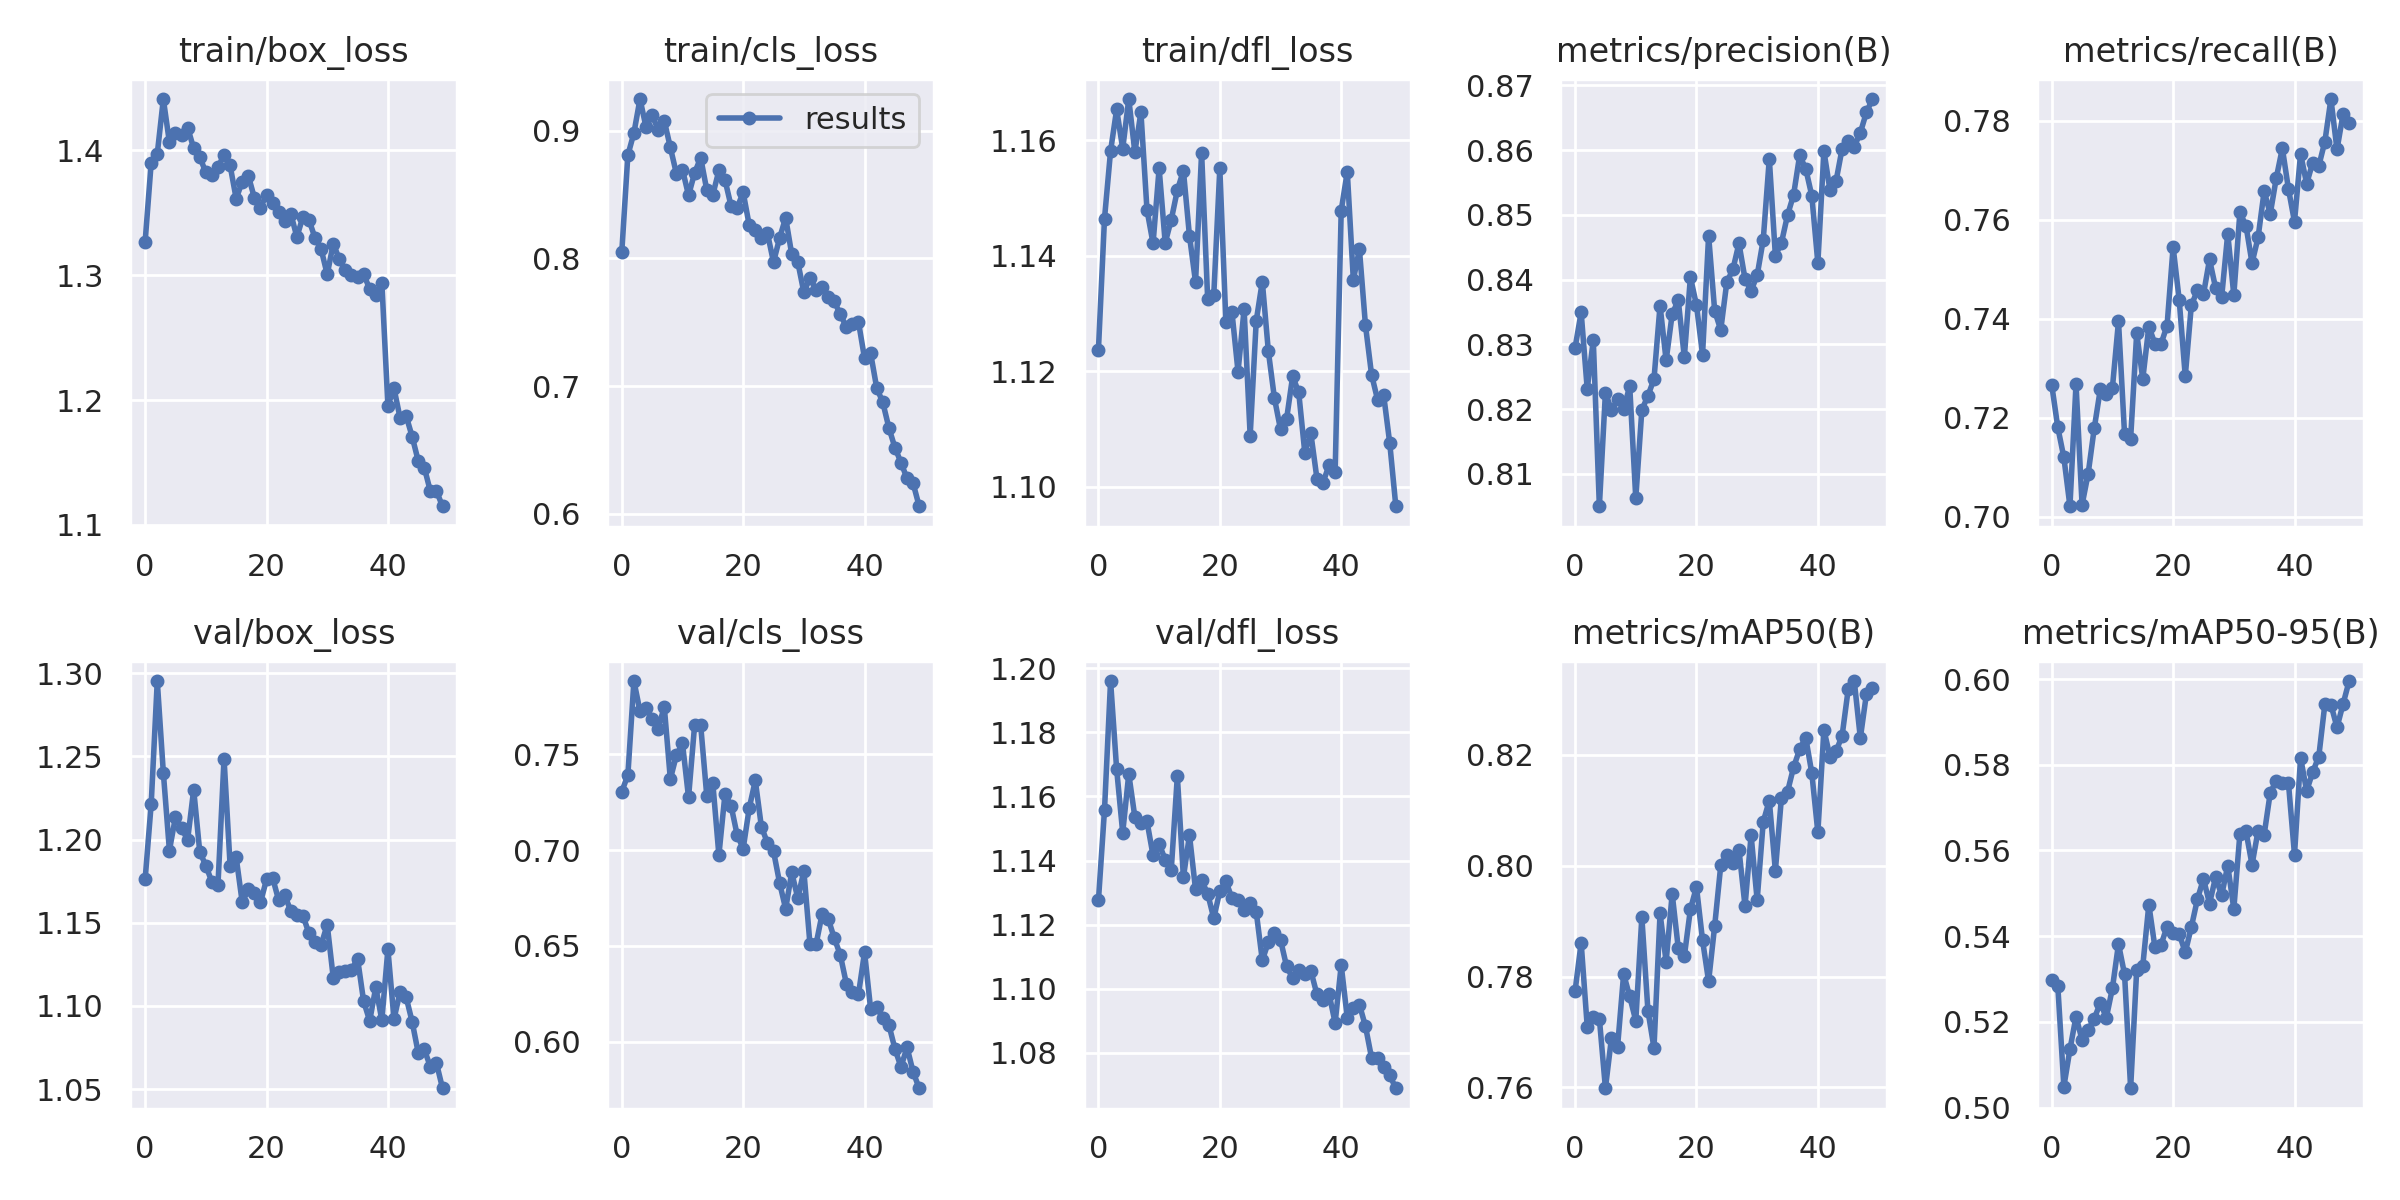

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


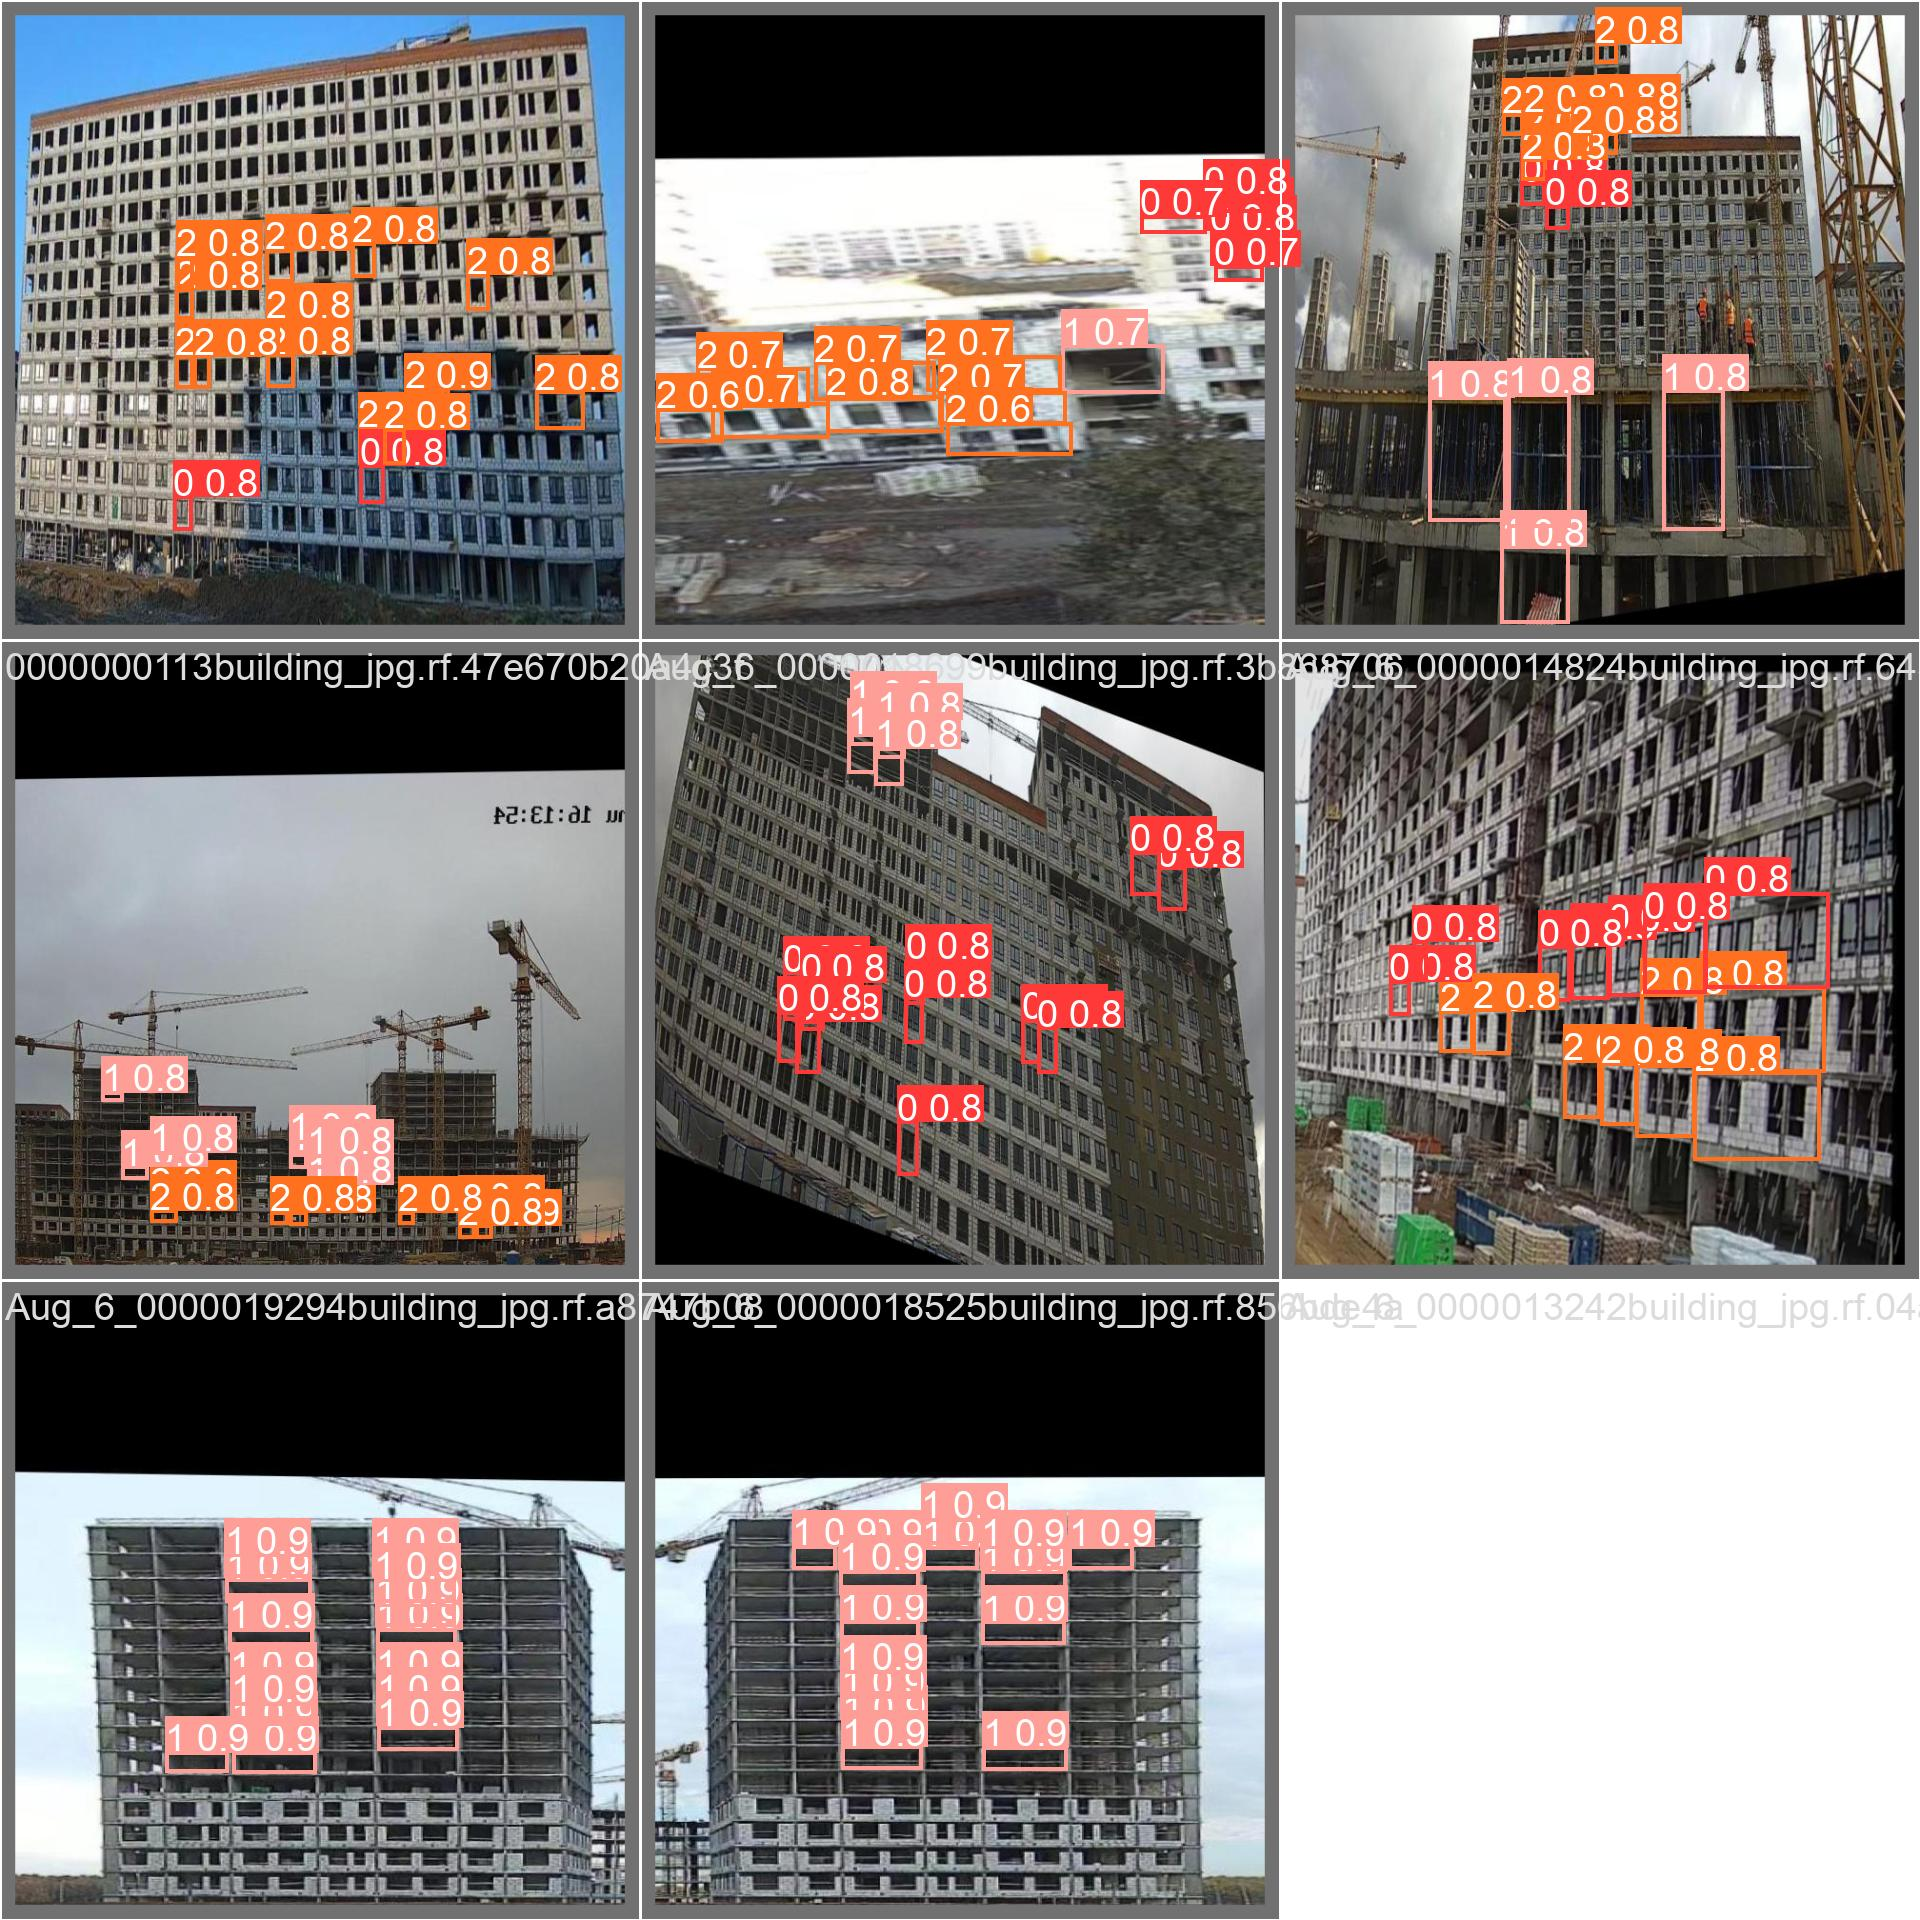

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-23 12:48:07.706055: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 12:48:08.579883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/samolet-final-2/valid/labels.cache... 345 images, 0 backgrounds, 0 corrupt: 100% 345/345 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/samolet-final-2/valid/images/0000017592building_jpg.rf.d3966ae7454cb1eec60c63d08c8ca0ef.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/samolet-final-2/valid/images/Aug_6_0000006838building_jpg.rf.

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-09-23 12:50:36.172790: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 12:50:37.417085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
image 1/354 /content/datasets/samolet-final-2/test/images/0000001913building_jpg.rf.c0782b4262d2146f8a01a083b1ee22bb.jpg: 640x640 1 0, 144 1s, 110 2s, 37.5ms
image 2/354 /content/datasets/samolet-final-2/test/images/0000002399building_jpg.rf.8c151dcd75b8727724dc8e3b4678d871.jpg: 640x640 13 1s, 37.0ms
image 3/354 /content/datasets/samolet-final-2/test/images/0000003743building_jpg.rf.f

**NOTE:** Let's take a look at few results.

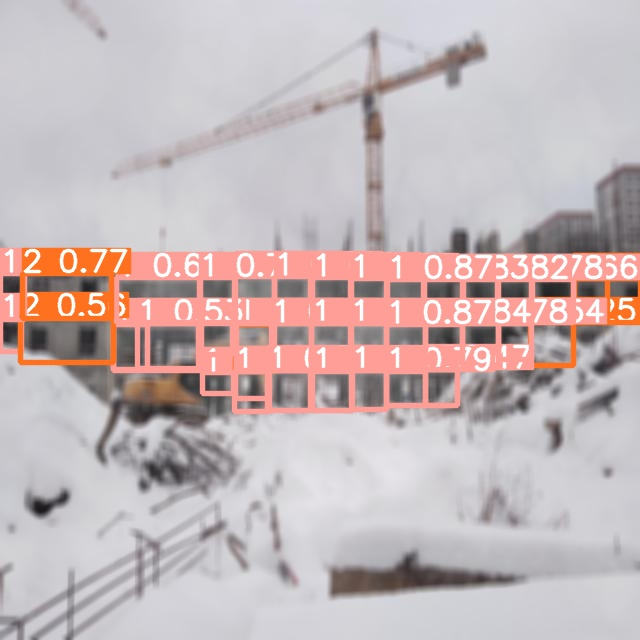

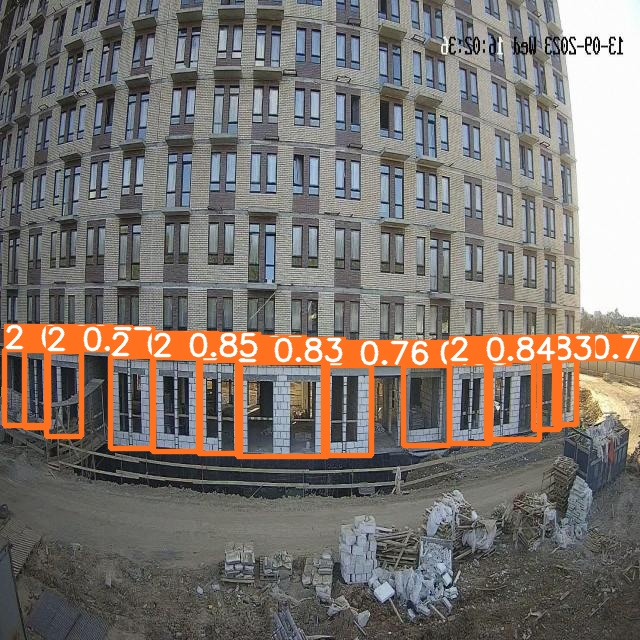

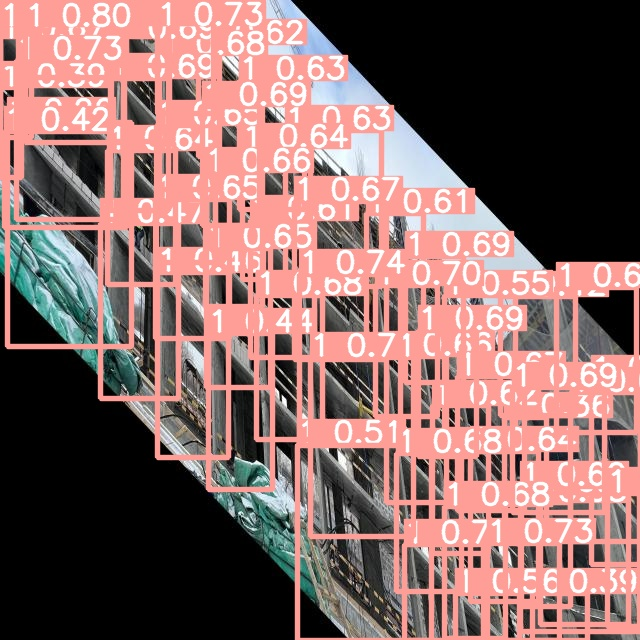

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.